## 데이터 가져오기

In [1]:
import pandas as pd

data_path = './data/kaggle/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

In [2]:
print(train.shape, test.shape)
# 각 30만, 20만개 데이터

print(train.head())
print(train.info())
# bin, nom, ord, day, month, target 으로 구성

(300000, 24) (200000, 23)
    bin_0  bin_1  bin_2 bin_3 bin_4  nom_0      nom_1    nom_2    nom_3  \
id                                                                        
0       0      0      0     T     Y  Green   Triangle    Snake  Finland   
1       0      1      0     T     Y  Green  Trapezoid  Hamster   Russia   
2       0      0      0     F     Y   Blue  Trapezoid     Lion   Russia   
3       0      1      0     F     Y    Red  Trapezoid    Snake   Canada   
4       0      0      0     F     N    Red  Trapezoid     Lion   Canada   

       nom_4  ...      nom_9 ord_0        ord_1        ord_2 ord_3  ord_4  \
id            ...                                                           
0    Bassoon  ...  2f4cb3d51     2  Grandmaster         Cold     h      D   
1      Piano  ...  f83c56c21     1  Grandmaster          Hot     a      A   
2   Theremin  ...  ae6800dd0     1       Expert     Lava Hot     h      R   
3       Oboe  ...  8270f0d71     1  Grandmaster  Boiling Hot   

In [3]:
# 답안 제출 형식 확인 - 클래스가 아닌 확률로 제출
print(submission.head())

        target
id            
300000     0.5
300001     0.5
300002     0.5
300003     0.5
300004     0.5


### 데이터 탐색

In [4]:
# 함수의 정보를 요약하는 함수
# 데이터를 가져올 때마다 데이터의 정보를 빠르게 확인 가능
def datafeature(df):
    print('데이터의 구조 :', df.shape)
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index' : 'Feature'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫번째 값'] = df.loc[0].values
    summary['두번째 값'] = df.loc[1].values
    summary['세번째 값'] = df.loc[2].values
    
    return summary

In [5]:
datafeature(train)

데이터의 구조 : (300000, 24)


,Feature,데이터 타입,결측값 개수,고유값 개수,첫번째 값,두번째 값,세번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [6]:
# 순서형 feature 목록 확인
# 순서형 feature 에서 고유한 데이터들 확인

for i in range(3):
    feature = 'ord_' + str(i)
    # 문자열이 아닌 데이터를 출력하고자 하는 경우
    # f'{데이터}
    # 문자열이 아닌 데이터를 문자열과 함께 출력할 때 사용
    print(feature + f' 고유 값 : {train[feature].unique()}')

ord_0 고유 값 : [2 1 3]
ord_1 고유 값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고유 값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [7]:
print('month 고유값 :', train['month'].unique())
print('day 고유값 :', train['day'].unique())
print('target 고유값 :', train['target'].unique())

month 고유값 : [ 2  8  1  4 10  3  7  9 12 11  5  6]
day 고유값 : [2 7 5 4 3 1 6]
target 고유값 : [0 1]


### 시각화를 이용한 데이터 탐색

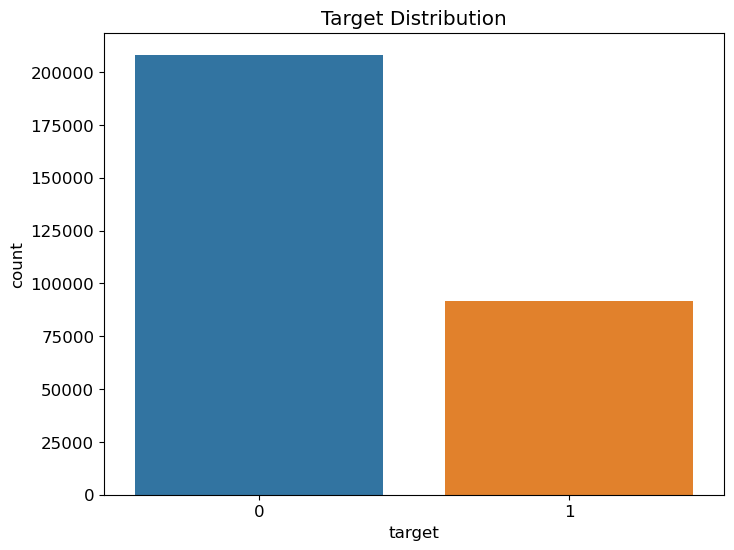

In [8]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# 타겟의 분포 확인

# 글자 크기 설정
mpl.rc('font', size = 12)
plt.figure(figsize = (8, 6))
# 영역 확보
ax = sns.countplot(x = 'target', data = train)
ax.set(title = 'Target Distribution')

plt.show()

In [9]:
# 첫번째 막대에 대한 정보 확인
# 막대에 대한 정보를 바탕으로 그래프에 텍스트 위치를 설정

rect1 = ax.patches[0]
rect2 = ax.patches[1]
print('높이 :', rect1.get_height(),  ',' ,rect2.get_height())
print('너비 :', rect1.get_width(),  ',' ,rect2.get_width())
print('왼쪽 테두리의 x 좌표 :',  rect1.get_x(), ',', rect2.get_x())

높이 : 208236.0 , 91764.0
너비 : 0.8 , 0.8
왼쪽 테두리의 x 좌표 : -0.4 , 0.6


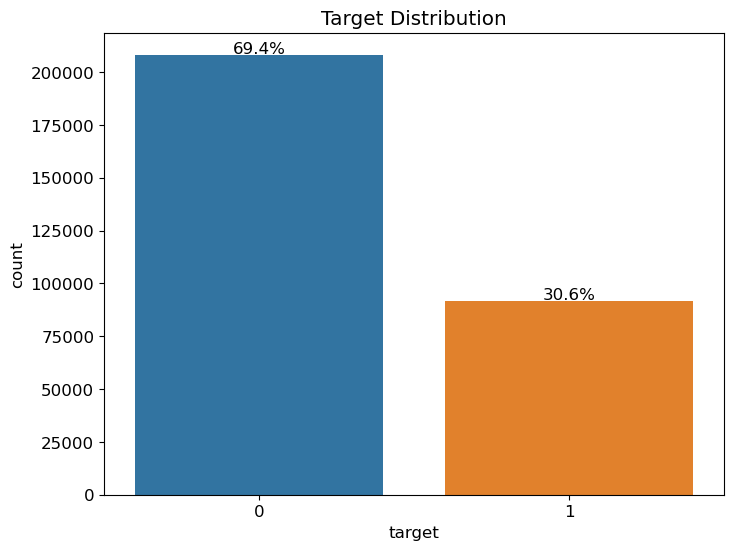

In [10]:
# 텍스트 출력 - 비율을 표시
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        # 막대의 높이를 이용해서 비율 구하기
        percent = height/total_size * 100
        # 텍스트 출력 - 위에 비율을 표시
        # 왼족 테두리 좌표를 가지고 x 좌표 계산
        # y 좌표는 높이보다 조금 더 높게 설정
        ax.text(x = left_coord + width/2.0,
               y = height + total_size * 0.002,
               s = f'{percent:1.1f}%',
               ha = 'center')
        
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

plt.show()

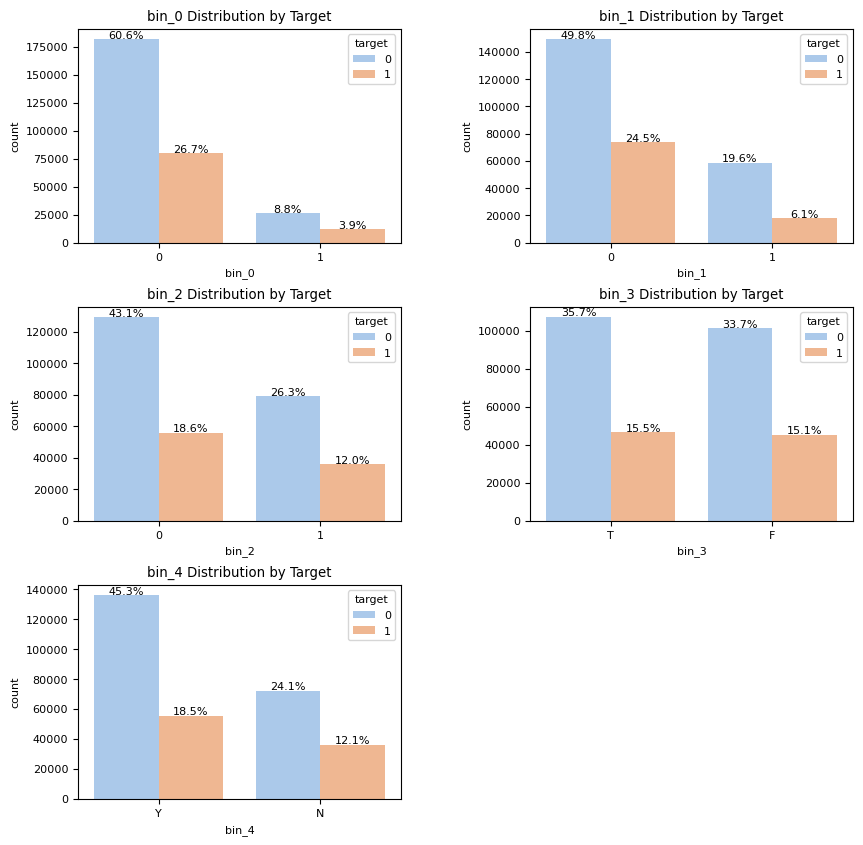

In [11]:
# 여러 개의 이진 데이터 분포 확인

# 여러 개의 이미지를 출력할 때 사용하는 격자(grid)
import matplotlib.gridspec as gridspec

mpl.rc('font', size = 8)

# 3행 2열 공간을 설정
grid = gridspec.GridSpec(3, 2)
plt.figure(figsize = (10, 10))
# 여백과 공간 설정
plt.subplots_adjust(wspace = 0.4, hspace = 0.3)

# bin 으로 시작하는 feature 출력

# 시각화 할 컬럼 리스트
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    # hue 는 색상
    sns.countplot(x = feature, data = train, hue = 'target',
                 palette = 'pastel', ax = ax)
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))



### 교차 분석표를 이용한 데이터 분포 확인

In [12]:
# 교차 분석표 - crosstab
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [13]:
# 교차 분석표를 백분율로 확인
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize = 'index') * 100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [14]:
# 인덱스를 일련번호로 수정
# 인덱스에 있던 nom_0 가 표 안으로 들어오고
# 인덱스는 일련 번호로 대체됨
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [15]:
# 교차 분석표를 생성하는 함수
# 데이터와 feature 를 입력하면 그들에 대한 분석표를 생성
def get_crosstab(df, feature):
    crosstab = pd.crosstab(train[feature], train['target'], normalize = 'index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

crosstab = get_crosstab(train, 'nom_0')
crosstab
    

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


## 데이터 전처리

In [16]:
print(train['ord_1'].unique())
print(train['ord_2'].unique())
# ord_1 은 Novice, Contributor, Expert, 
# Master, Grandmaster 순으로 카테고리를 설정
# ord_2 는 Freezing, Cold, Warm, Hot,
# Boiling Hot, Lava Hot 순으로 카테고리를 설정

['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [17]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 문자열 list 를 타입으로 생성 - enum
# 파이썬에는 enum 이 없음
ord_1_dtype = CategoricalDtype(categories = ord_1_value, ordered = True)
ord_2_dtype = CategoricalDtype(categories = ord_2_value, ordered = True)

# 생성한 타입으로 기준의 순서형 데이터를 변환
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   bin_0   300000 non-null  int64   
 1   bin_1   300000 non-null  int64   
 2   bin_2   300000 non-null  int64   
 3   bin_3   300000 non-null  object  
 4   bin_4   300000 non-null  object  
 5   nom_0   300000 non-null  object  
 6   nom_1   300000 non-null  object  
 7   nom_2   300000 non-null  object  
 8   nom_3   300000 non-null  object  
 9   nom_4   300000 non-null  object  
 10  nom_5   300000 non-null  object  
 11  nom_6   300000 non-null  object  
 12  nom_7   300000 non-null  object  
 13  nom_8   300000 non-null  object  
 14  nom_9   300000 non-null  object  
 15  ord_0   300000 non-null  int64   
 16  ord_1   300000 non-null  category
 17  ord_2   300000 non-null  category
 18  ord_3   300000 non-null  object  
 19  ord_4   300000 non-null  object  
 20  ord_5   300000 non-null  o

## 기본 모델링

### 데이터 가져오기

In [18]:
train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

### 데이터 전처리

In [19]:
# 전처리를 하기 전에 훈련 데이터와 테스트 데이터를 결합
all_data = pd.concat([train, test])
# target 은 전처리 대상이 아니므로 제외
all_data = all_data.drop('target', axis = 1)
# 확인 - 데이터 50만개
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   500000 non-null  int64 
 1   bin_1   500000 non-null  int64 
 2   bin_2   500000 non-null  int64 
 3   bin_3   500000 non-null  object
 4   bin_4   500000 non-null  object
 5   nom_0   500000 non-null  object
 6   nom_1   500000 non-null  object
 7   nom_2   500000 non-null  object
 8   nom_3   500000 non-null  object
 9   nom_4   500000 non-null  object
 10  nom_5   500000 non-null  object
 11  nom_6   500000 non-null  object
 12  nom_7   500000 non-null  object
 13  nom_8   500000 non-null  object
 14  nom_9   500000 non-null  object
 15  ord_0   500000 non-null  int64 
 16  ord_1   500000 non-null  object
 17  ord_2   500000 non-null  object
 18  ord_3   500000 non-null  object
 19  ord_4   500000 non-null  object
 20  ord_5   500000 non-null  object
 21  day     500000 non-null  int64 
 

In [20]:
# 범주형 데이터를 원 핫 잍코딩

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

# 원 핫 인코딩을 거치면 ndarray 가 되므로 확인 방식도 달라짐
all_data_encoded[0]

<1x16552 sparse matrix of type '<class 'numpy.float64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [27]:
# 훈련 데이터와 테스트 데이터를 다시 분리
# 데이터를 합쳐서 전처리를 하고 끝마친 뒤 다시 분리

num_train = len(train)
X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]

y = train['target']

In [28]:
# 훈련에 사용할 데이터와 검증을 위한 데이터 분리

from sklearn.model_selection import train_test_split

# 데이터를 확인했을 때 0 과 1 의 비율 차이가 컸으므로
# 층화 추출을 이용해서 테스트와 검증 데이트를 생성
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,test_size = 0.2,
                                                   random_state = 21, stratify = y)

### 모델 생성 및 훈련

In [29]:
# 이진 분류이므로 모든 분류기를 사용할 수 있음
# 그 중 로지스틱 회귀를 사용
from sklearn.linear_model import LogisticRegression

# 모델 만들기
logistic_model = LogisticRegression(max_iter = 1000, random_state = 21)

# 훈련
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=21)

In [30]:
# 예측을 통해 확인
logistic_model.predict(X_test)

# 예측 확률
logistic_model.predict_proba(X_test)

array([[0.68355424, 0.31644576],
       [0.37756629, 0.62243371],
       [0.91737753, 0.08262247],
       ...,
       [0.70696487, 0.29303513],
       [0.44142422, 0.55857578],
       [0.76940437, 0.23059563]])

### 평가 지표 확인

In [32]:
# 이 문제에서는 평가 지표로 ROC AUC 를 사용
# 1이 될 확률을 사용
y_preds = logistic_model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_preds)
print(roc_auc) # 0.7959
print(y_preds.shape)

0.7959327985722137
(60000,)


### 제출용 결과 파일을 생성

In [33]:
y_preds = logistic_model.predict_proba(X_test)[:, 1]

# 결과로 나온 1이 될 확률을 submission 파일의 target 에 반영
submission['target'] = y_preds
# 제출할 csv 파일 생성
submission.to_csv('submission.csv')

## 모델 수정

In [ ]:
# 데이터 확인
all_data.head()

## 이진 feature 인코딩

In [ ]:
# 문자로 된 경우 숫자로 수정
# bin_3 에서 F 는 0으로, T 는 1로 수정
# bin_4 에서 N 는 0으로, Y 는 1로 수정

all_data['bin_3'] = all_data['bin_3'].map({'F' : 0, 'T' : 1})
all_data['bin_4'] = all_data['bin_4'].map({'N' : 0, 'Y' : 1})

all_data.head()

In [ ]:
# 순서형 범주의 경우 순서를 지켜서 숫자로 수정

# 순서형 목록을 직접 인코딩
# dict 생성
ord1dict = {'Novice' : 0, 'Contributor' : 1, 'Expert' : 2, 'Master' : 3, 'Grandmaster' : 4}
ord2dict = {'Freezing' : 0, 'Cold' : 1, 'Warm' : 2, 'Hot' : 3, 'Boiling Hot' : 4, 'Lava Hot' : 5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

all_data.head()

## 순서형 목록 인코딩

In [ ]:
# ord_3, 4, 5 는 순서가 있는 범주형이므로 
# 원 핫 인코딩 대신 Ordinal encoding 을 수행
# 다른 숫자로 대체하는게 아니라 순서대로 정렬

from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

## 명목형 목록 인코딩

In [ ]:
nom_features = ['nom_' + str(i) for i in range(10)]

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

all_data = all_data.drop(nom_features, axis = 1)

print(all_data.head())

## 날짜 목록 인코딩

In [ ]:
# 이전과 같은 방식으로 인코딩 수행

date_features = ['day', 'month']
encoded_date_matrix = onehot_encoder.fit_transform(all_data[data_features])
all_data = all_data.drop(date_features, axis = 1)

print(encoded_date_matrix)
print(all_data.head())

## 순서형 목록은 스케일링

In [ ]:
# MinMax 방식으로 스케일링 적용
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)]
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])
# 스케일링 결과 확인
all_data[ord_features]

## 인코딩 한 데이터와 스케일링 한 데이터 결합

In [ ]:
from scipy import sparse

all_data_sparse = sparse.hstack([sparse.csr_matrix(all_data),
                               encoded_nom_matrix, encoded_date_matrix],
                                 format = 'csr')

all_data_sparse

## 훈련 데이터와 검증 데이터 생성

In [ ]:
num_train = len(train)

X_train = all_data_sparse[:num_train]
X_test = all_data_sparse[num_train:]
y = train['target']

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, stratify = y,
                                                     test_size = 0.2, random_state = 21)

## 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression()

# 파라미터 목록 생성
lr_params = {
    'C' : [0.1, 0.125, 0.2, 0.3],
    'max_iter' : [500, 800, 1000],
    'solver' : ['liblinear'],
    'random_state' : [21]
}

gridsearch_logistic_model = GridSearchCV(estimator = logistic_model, 
                                        param_grid = lr_params,
                                        scoring = 'roc_auc', cv = 5)

gridsearch_logistic_model.fit(X_train, y_train)

print('최적의 파라미터 :', gridsearch_logistic_model.best_params_)